In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
text = 'p'
file = "NEW_3gram_alpha1_windows1to6_"+text
# file = "NEW_3gram_alpha0_windows1to6_"+text

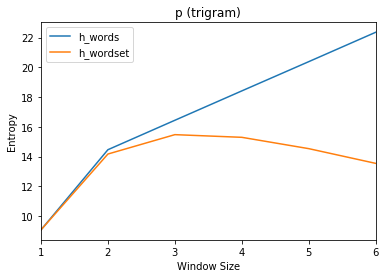

In [66]:
df = pd.read_csv(file, index_col=0, parse_dates=True)
df['window_size'] = [1,2,3,4,5,6]
ax = df.plot(x="window_size", y=["h_words", "h_wordset"], title=text+" (trigram)")
ax.set(xlabel="Window Size", ylabel="Entropy")
ax.set_xticks(range(1,7,1))
plt.show()


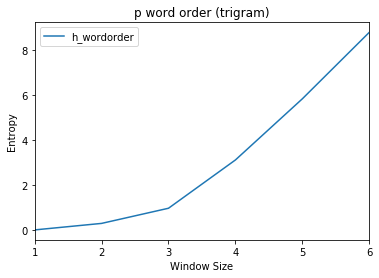

In [67]:
# df['h_wordorder'] = df['h_words'] - df['h_wordset']
# ax = df.plot(x="window_size", y=['h_wordorder'], title=text+" word order (trigram)")
# ax.set(xlabel="Window Size", ylabel="Entropy")
# ax.set_xticks(range(1,8,1))
# plt.show()

df['h_wordorder'] = df['h_words'] - df['h_wordset']
ax = df.plot(x="window_size", y=['h_wordorder'], title=text+" word order (trigram)")
ax.set(xlabel="Window Size", ylabel="Entropy")
ax.set_xticks(range(1,7,1))
plt.show()

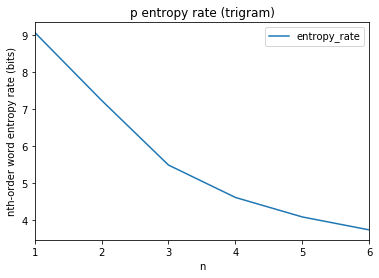

In [68]:
# df['entropy_rate'] = df['h_words'] / df['window_size']
# ax = df.plot(x="window_size", y=['entropy_rate'], title=text+" entropy rate (trigram)")
# ax.set(xlabel="n", ylabel="nth-order word entropy rate (bits)")
# ax.set_xticks(range(1,8,1))
# plt.show()

df['entropy_rate'] = df['h_words'] / df['window_size']
ax = df.plot(x="window_size", y=['entropy_rate'], title=text+" entropy rate (trigram)")
ax.set(xlabel="n", ylabel="nth-order word entropy rate (bits)")
ax.set_xticks(range(1,7,1))
plt.show()

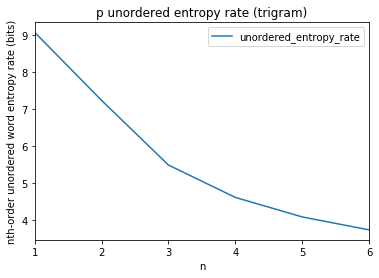

In [69]:
# df['unordered_entropy_rate'] = df['h_words'] / df['window_size']
# ax = df.plot(x="window_size", y=['unordered_entropy_rate'], title=text+" unordered entropy rate (trigram)")
# ax.set(xlabel="n", ylabel="nth-order unordered word entropy rate (bits)")
# ax.set_xticks(range(1,8,1))
# plt.show()

df['unordered_entropy_rate'] = df['h_words'] / df['window_size']
ax = df.plot(x="window_size", y=['unordered_entropy_rate'], title=text+" unordered entropy rate (trigram)")
ax.set(xlabel="n", ylabel="nth-order unordered word entropy rate (bits)")
ax.set_xticks(range(1,7,1))
plt.show()

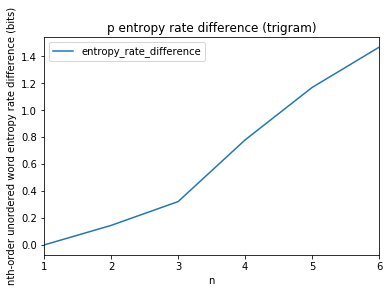

In [70]:
# df['entropy_rate_difference'] = (df['h_words'] - df['h_wordset']) / df['window_size']
# ax = df.plot(x="window_size", y=['entropy_rate_difference'], title=text+" entropy rate difference (trigram)")
# ax.set(xlabel="n", ylabel="nth-order unordered word entropy rate difference (bits)")
# ax.set_xticks(range(1,8,1))
# plt.show()

df['entropy_rate_difference'] = (df['h_words'] - df['h_wordset']) / df['window_size']
ax = df.plot(x="window_size", y=['entropy_rate_difference'], title=text+" entropy rate difference (trigram)")
ax.set(xlabel="n", ylabel="nth-order unordered word entropy rate difference (bits)")
ax.set_xticks(range(1,7,1))
plt.show()
